In [1]:
import numpy as np
import pylidc as pl
import pandas as pd
import matplotlib.pyplot as plt
from pylidc.utils import consensus
from skimage.measure import find_contours
import os
from scipy.ndimage import gaussian_filter
import seaborn as sns

# Analysing medical data to help improve society's quality of life

How can we as a small group of incipient engineers use medical data to help improve society's quality of life?<br>
There is endless types of medical data out there for different diseases, which data should we use in order to help as many people as possible?<br>
In other words, which diseases have the most significant negative impact on society's quality of life as of today?

The ***prevelance*** of the disease alone is not enough to quantify this, take herpes for example. The herpes simplex virus is one of the most common diseases on earth. It is estimated that well over 50% of the world population is infected with the virus. However, most people are completely unaware that they are and show little to no symptoms. There is no cure and once you are infected, the virus will most likely stay in your body for the rest of your life.<br> 
***Conclusion:*** quality of life is only significantly effected if the disease causes pain or limits the patient ablilities.

The most severe effect of a disease is when it causes death, after all, you can't have any "quality of life" anymore if your life has come to an end. <br> 
***Conclusion:*** If we want to have a big impact on society's quality of life it might be interesting to look at the diseases that cause the most deaths.

### Most common causes of death

Data source: https://ourworldindata.org/

In [3]:
data=pd.read_csv("annual-number-of-deaths-by-cause.csv")
print(data.shape)
data.head(5)

(6686, 36)


,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
0,Afghanistan,AFG,1990,856.0,28372.0,2708.0,3394.0,1349.0,6177.0,1708.0,...,222.0,567.0,703.0,NaN,6469.977091,22836.912346,295.382207,1607.703797,1508.0,12.0
1,Afghanistan,AFG,1991,908.0,30368.0,2851.0,3641.0,1443.0,6522.0,1792.0,...,230.0,588.0,754.0,NaN,6347.158764,22325.633931,303.866598,1558.132316,3498.0,68.0
2,Afghanistan,AFG,1992,970.0,33035.0,3057.0,3967.0,1572.0,7009.0,1911.0,...,250.0,623.0,820.0,NaN,6659.741428,23205.280750,317.750121,1617.721576,4341.0,49.0
3,Afghanistan,AFG,1993,1066.0,36512.0,3329.0,4398.0,1735.0,7655.0,2071.0,...,289.0,674.0,894.0,NaN,8068.386263,28229.715397,333.978331,1931.808553,NaN,NaN
4,Afghanistan,AFG,1994,1161.0,40285.0,3641.0,4870.0,1911.0,8377.0,2243.0,...,315.0,731.0,977.0,NaN,9432.845127,32652.297630,348.419085,2351.629206,9090.0,22.0


For each "Entity" the year ranges from 1990 to 2017

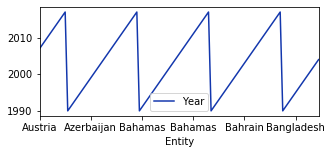

In [4]:
data[380:490].plot(x='Entity',y='Year',color='#1337AD', figsize = (5,2))

One of the entities is "world" which contains the summations over all countries. Let's see which diseases are most prevelent world wide

In [5]:
df = data[data["Entity"]=='World'].iloc[:,2:].sort_values(6572, ascending=False, axis=1)

Text(0.5, 1.0, 'Amount of recorded deaths 1990-2017')

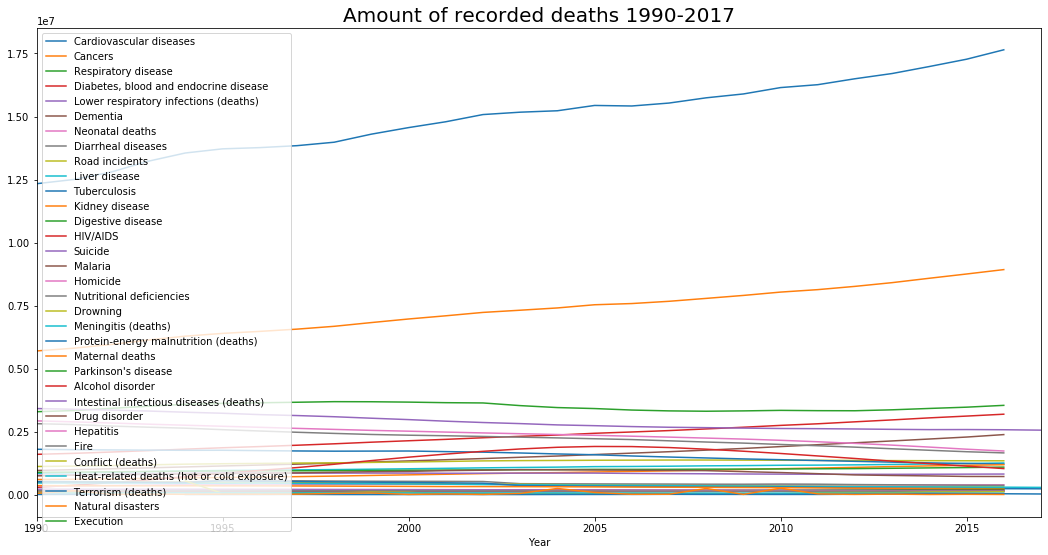

In [7]:
df.plot(x='Year', figsize=(18,9))
plt.title('Amount of recorded deaths 1990-2017', fontsize=20)

It is clear that cardiovascular disease is by far the most common cause of death, followed by cancer, respiratory disease, ... <br> Note that cardiovascular diease is also the faster growing cause of death!

Out of sheer curiosity, let's check if cardiovascular disease is the leading cause of death in every country!

In [8]:
df = data[data['Year']==2016]

In [9]:
df = df[np.isfinite(df['Cardiovascular diseases'])].fillna(0)

In [10]:
df.head()

,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
26,Afghanistan,AFG,2016,2903.0,80333.0,8048.0,9922.0,4086.0,21413.0,4079.0,...,447.0,636.0,2248.0,6,6672.896174,21359.253797,435.834889,1363.976372,16502.0,6142.0
54,Albania,ALB,2016,958.0,13002.0,390.0,767.0,308.0,687.0,187.0,...,5.0,5.0,181.0,0,18.791867,372.204796,0.167811,3.294710,0.0,0.0
82,Algeria,DZA,2016,11868.0,71758.0,7544.0,6130.0,3846.0,18323.0,2489.0,...,112.0,127.0,1436.0,0,393.549374,4757.142031,153.756749,84.184354,47.0,9.0
110,American Samoa,ASM,2016,8.0,100.0,21.0,17.0,6.0,74.0,6.0,...,2.0,1.0,5.0,0,0.737231,13.583508,0.784349,1.460883,0.0,0.0
166,Andorra,AND,2016,99.0,238.0,8.0,42.0,9.0,27.0,20.0,...,0.0,0.0,8.0,0,0.252947,30.006232,0.003741,0.129850,0.0,0.0


In [11]:
booleans = np.array(df.max(axis=1)) == np.array(df['Cardiovascular diseases'])
print(booleans)

[ True  True  True False False  True False  True  True  True  True  True
 False False  True False  True  True False  True False False  True  True
 False  True False  True False False  True False False False  True False
  True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True False False False  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True False
  True  True  True  True False False False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True False  True  True False  True
 False False False False  True  True  True False  True  True  True  True
  True False  True False  True False  True  True False False  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True False  True  True  True Fa

In [12]:
print('Cardiovascular disease is the leading cause of death in '+str(100*sum(booleans)/len(booleans))+'% of the listed countries.')

Cardiovascular disease is the leading cause of death in 67.71300448430493% of the listed countries.


In [13]:
booleans = np.array(df.max(axis=1)) == np.array(df['Cancers'])
print('Cancer is the leading cause of death in '+str(100*sum(booleans)/len(booleans))+'% of the listed countries.')

Cancer is the leading cause of death in 4.0358744394618835% of the listed countries.


<font color='red'>Future Idea: Make a world map of the most prevelent disease in each country? IDK if its usefull but i notice from other year a lot of people visually represent their data in maps, probably because it looks so damn cool :p</font>

### Cardiovascular disease

Data source: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Before we blindly dive into data, let's ask ourselves the question: Why is cardiovascular disease the most common cause of death? <br>
From a medical point of view, cardiovascular disease is fairly well understood, so why is it that as of today it can't simply be prevented?

It turns out that cardiovascular disease comes with a certain level of "inevetability", this is in part due to a phenonmenon known as "arterial stiffening".

Large arteries are roughly devided into 3 main sections:
<img src="section-artery.jpg" width="500" height="200">

It is the middle section that causes the main problem, it contains elastic fibres (a protein known as elastin) which gives the artery its elastic properties and helps the blood to be pumped around in your body. As it turns out, since this layer is sandwhiched between two other layers, our body has trouble repairing/replacing the elastin as it degrades over time. Additionally it has been shown that the elastin protein has an approximate half-life of 74 years (Shapiro et al., 1991). This value is relatively close to the current life expectancy in developed countries (~80y). This phenonmenon is still actively being researched and is currently an ultimate limitation to the age a humans can reach.

In [14]:
data=pd.read_csv("cardio_train.csv", delimiter=';')
print(data.shape)
data.head(5)

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
corr = data.corr()

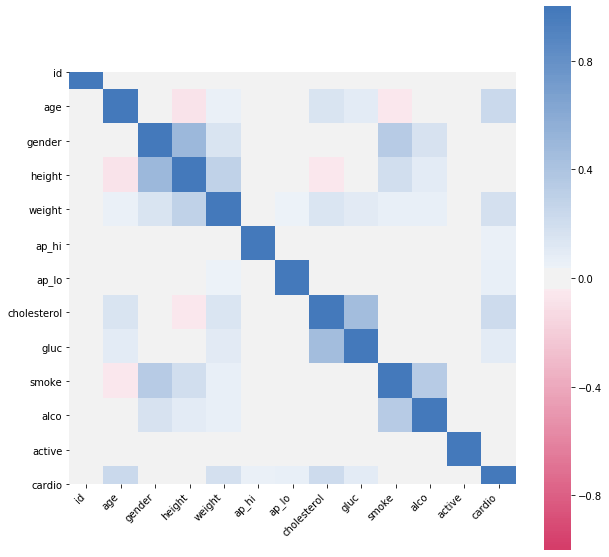

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The very last column of the data "cardio" is a binary value which determines wether the concidered person was diagnosed with cardio vascular disease. Note that in reality heart disease is not at all "binary", a it doesn't quanity the severity/type of cardio vascular disease.<br>
Observe that, the feature "age" is most strongly correlation to the prevalence of cardio vascular disease which is very much expected concidering what was discussed above. The other two big influencers are "cholesterol" and "weight". Note that these two are also strongly correlated, and that "cholesterol" is also strongly correlated to "age".

Cholesterol plays a crucial role in every cell of your body, so how is it that its prevelance is so strongly correlated to the disease that causes most peopele? <br>
Cholesterol is a lipid, it is a type of "fat". It can build up excessively in the blood circulation and can be hard for the body to remove. The cholesterol (plaque) attaches to the blood vessel walls caussing them to narrow. This negatively effects the heamodynamics and can ultimately result in total occlusion of a blood vessle. The blockage results in poor perfusion and thus insufficient oxygen being delivered to the tissue.<br>

**Interpretation:** "age" (time) causes "cholesterol" to build up in the vascular system and this is accelated by "weight" (excessive eating, fatty diet or obesity)

<img src="plaque.png" width="400" height="170">

### Positive feedback loop

What is described above also expains why cardio vascular disease is so deadly. For most diseases, the body has developed ***negative feedback loops*** to prevent/cure them (e.g. the immune system). The problem with cardiovascular disease, more specifically coronary artery disease, is that in nature it is a ***positive feedback loop***.<br> 
When plaque builds up in the arties that supply oxygen to the heart, the heart weakens. This reduces blood perfusion in all tissues of the body, including the heart itself. Which again causes the heart to weaken, etc.. This is known as ***heart failure***



Interestingly, the strongest correlations in this dataset are not related to cardiovascular disease:

- height ~ gender
- height ~ weight
- cholesterol ~ glocuse levels (unhealthy diet)
- smoking ~ alcohol (unhealthy lifestyles)
- smoking ~ gender

**side quest:** Especially the last correlation is interesting. Which gender smokes most? How big is this difference?

In [17]:
df = data[['gender','smoke']]

In [18]:
females = df[df['gender']==1]
males = df[df['gender']==2]

In [19]:
print('male smokers: '+str(np.round(100*sum(males['smoke'])/males.size, 3))+'%')
print('female smokers: '+str(np.round(100*sum(females['smoke'])/females.size, 3))+'%')

male smokers: 10.944%
female smokers: 0.893%


According to this dataset, men smoke 10x more than women!<br>
This approximately agrees with findings in literature.

In [36]:
dataGeographic1=pd.read_csv("Geographic_disease_data/IHME-GBD_2017_DATA-6602a218-1.csv")
dataGeographic1.head(5)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,95,United Kingdom,3,Both,22,All Ages,366,Maternal disorders,1,Number,1990,59609.932226,75569.559146,45682.323133
1,5,Prevalence,95,United Kingdom,3,Both,22,All Ages,366,Maternal disorders,2,Percent,1990,0.001092,0.001386,0.000835
2,5,Prevalence,95,United Kingdom,3,Both,22,All Ages,366,Maternal disorders,3,Rate,1990,103.547394,131.270589,79.353982
3,5,Prevalence,95,United Kingdom,3,Both,22,All Ages,380,Neonatal disorders,1,Number,1990,769367.855743,865247.654041,683140.552374
4,5,Prevalence,95,United Kingdom,3,Both,22,All Ages,380,Neonatal disorders,2,Percent,1990,0.014095,0.015822,0.012512


In [37]:
#Years in data
years=np.unique(dataGeographic1["year"])
#countries in data
countries=np.unique(dataGeographic1["location_name"])

In [38]:
diseasesToStudy=["Cardiovascular diseases", 'Diabetes and kidney diseases', 'HIV/AIDS', 'Neglected tropical diseases and malaria', 
                 'Sexually transmitted infections excluding HIV', 'Tuberculosis', 'Chronic respiratory diseases']
data1=dataGeographic1[dataGeographic1["cause_name"].isin(diseasesToStudy)]

In [39]:
pivoted=pd.pivot_table(data1, index=["location_name", "year", "cause_name","measure_name"], columns="metric_name", values="val")
pivoted.head(5)

metric_name                                                                                   Number  \
location_name year cause_name                   measure_name                                           
Afghanistan   1990 Cardiovascular diseases      DALYs (Disability-Adjusted Life Years)  1.174287e+06   
                                                Deaths                                  4.649809e+04   
                                                Incidence                               8.383707e+04   
                                                Prevalence                              5.747248e+05   
                   Chronic respiratory diseases DALYs (Disability-Adjusted Life Years)  2.103217e+05   

metric_name                                                                              Percent  \
location_name year cause_name                   measure_name                                       
Afghanistan   1990 Cardiovascular diseases      DALYs (Disability-Adjusted Life Years)  0.093929   
                                                Deaths                                  0.237078   
                                                Incidence                               0.001385   
                                                Prevalence                              0.058095   
                   Chronic respiratory diseases DALYs (Disability-Adjusted Life Years)  0.016822   

metric_name                                                                                     Rate  
location_name year cause_name                   measure_name                                          
Afghanistan   1990 Cardiovascular diseases      DALYs (Disability-Adjusted Life Years)  11735.379883  
                                                Deaths                                    464.684360  
                                                Incidence                                 837.836146  
                                                Prevalence                               5743.583558  
                   Chronic respiratory diseases DALYs (Disability-Adjusted Life Years)   2101.875987

In [41]:
pivoted.loc["Afghanistan",1990, "HIV/AIDS", "Prevalence"]["Percent"]

4.02572314081e-05

In [49]:
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Federated States of Micronesia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' '

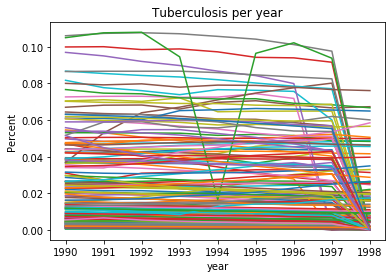

In [60]:
disease="Tuberculosis"
measure="Deaths"
metric="Percent"
#countries=[]
for country in countries:
    yearlyData=np.zeros(len(years))
    i=0
    for year in years:
        try:
            data=pivoted.loc[country, year, disease, measure][metric] #take value using multi index
        except KeyError as e:
            #print("KeyEData missing:", country, year, disease, measure, metric)
            data=0
        yearlyData[i]=data
        i+=1
    plt.plot(years, yearlyData, label=country)
    plt.title(disease+" per year")

#plt.legend()
plt.xlabel("Year")
plt.ylabel(metric)
plt.show()

In [53]:
#TODO Seaborn heatmap to better see distribution?? Other kinds of plots?
#Study correlation! Neighbouring countris -> disease spread?

In [45]:
yearlyData=pivoted.unstack(1)

Now plot tropical diseases per year per country.

In [25]:
for country in countries:
    

metric_name                                                                                Number  \
measure_name                                               DALYs (Disability-Adjusted Life Years)   
location_name year cause_name                                                                       
Afghanistan   1990 Cardiovascular diseases                                           1.174287e+06   
                   Chronic respiratory diseases                                      2.103217e+05   
                   Diabetes and kidney diseases                                      2.631256e+05   
                   HIV/AIDS                                                          1.734068e+03   
                   Neglected tropical diseases and malaria                           7.925635e+05   
...                                                                                           ...   
Zimbabwe      1997 Diabetes and kidney diseases                                               NaN   
                   HIV/AIDS                                                                   NaN   
                   Neglected tropical diseases and malaria                                    NaN   
                   Tuberculosis                                                               NaN   
              1998 Cardiovascular diseases                                                    NaN   

metric_name                                                               \
measure_name                                                      Deaths   
location_name year cause_name                                              
Afghanistan   1990 Cardiovascular diseases                  46498.085024   
                   Chronic respiratory diseases              5954.958582   
                   Diabetes and kidney diseases              6574.729948   
                   HIV/AIDS                                    32.098129   
                   Neglected tropical diseases and malaria  12909.905977   
...                                                                  ...   
Zimbabwe      1997 Diabetes and kidney diseases              2479.407458   
                   HIV/AIDS                                 86742.266841   
                   Neglected tropical diseases and malaria    805.788695   
                   Tuberculosis                              5791.805273   
              1998 Cardiovascular diseases                  12742.869825   

metric_name                                                               \
measure_name                                                   Incidence   
location_name year cause_name                                              
Afghanistan   1990 Cardiovascular diseases                  8.383707e+04   
                   Chronic respiratory diseases             1.427493e+05   
                   Diabetes and kidney diseases             6.576543e+04   
                   HIV/AIDS                                 7.830464e+01   
                   Neglected tropical diseases and malaria  1.809945e+06   
...                                                                  ...   
Zimbabwe      1997 Diabetes and kidney diseases                      NaN   
                   HIV/AIDS                                          NaN   
                   Neglected tropical diseases and malaria           NaN   
                   Tuberculosis                                      NaN   
              1998 Cardiovascular diseases                           NaN   

metric_name                                                               \
measure_name                                                  Prevalence   
location_name year cause_name                                              
Afghanistan   1990 Cardiovascular diseases                  5.747248e+05   
                   Chronic respiratory diseases             9.587549e+05   
                   Diabetes and kidney diseases             1.160282e+06   

Did you know large hospitals can generate up to hundreds of terabytes of medical data each year? <br>
Aditionally, the amount of data hospitals generate only increase with time.

In many countries (almost all developed countries), hospitals are by law required to store this medical data for 5 to 10 years.

As (_nascent_) datascientists we recognize that this medical data can be provide priceless amount of information that could help improve health care. <br>
When properly refigned, this data could have a significant impact on society's quality of life.

It is therefore very dissapointing that as of today the large majority of medical data is simply stored and left unused, primarily due to privacy laws and regulations.

However, the consesus surrounding this topic is starting to shift and effort are being made to help the medical field reap the benefits of Data Science.

One of these effort is a website called "The Cancer Imaging Archieve (TCIA)" https://www.cancerimagingarchive.net/ <br>
Which contains a wealth of medical imaging data in a large variety of different forms (CT, MRI, microscopic biopsy, radiographs, ...)

In this notebook specifically, we will be looking at one of the most extensive datasets that can be found in this archive. <br>
The LIDC-IDRI dataset contains 1013 thoracic CT scans. These come in DICOM file format but can easily be transfered to numpy arrays.

All the CT scans in the dataset were taken with the intent of diagnosing / ruling out lung cancer.  <br>

Some facts about lung cancer that make this dataset all that more interesting:

- Cancer is the second most common cause of death only preceded by cardiovascular disease.
- Lung cancer is the second most prevelent form of cancer in both men and woman (secondary to prostate and breast cancer respectively).
- Lung cancer is one of the most lethal forms of cancer as it only has a 5 year survival rate of 20%

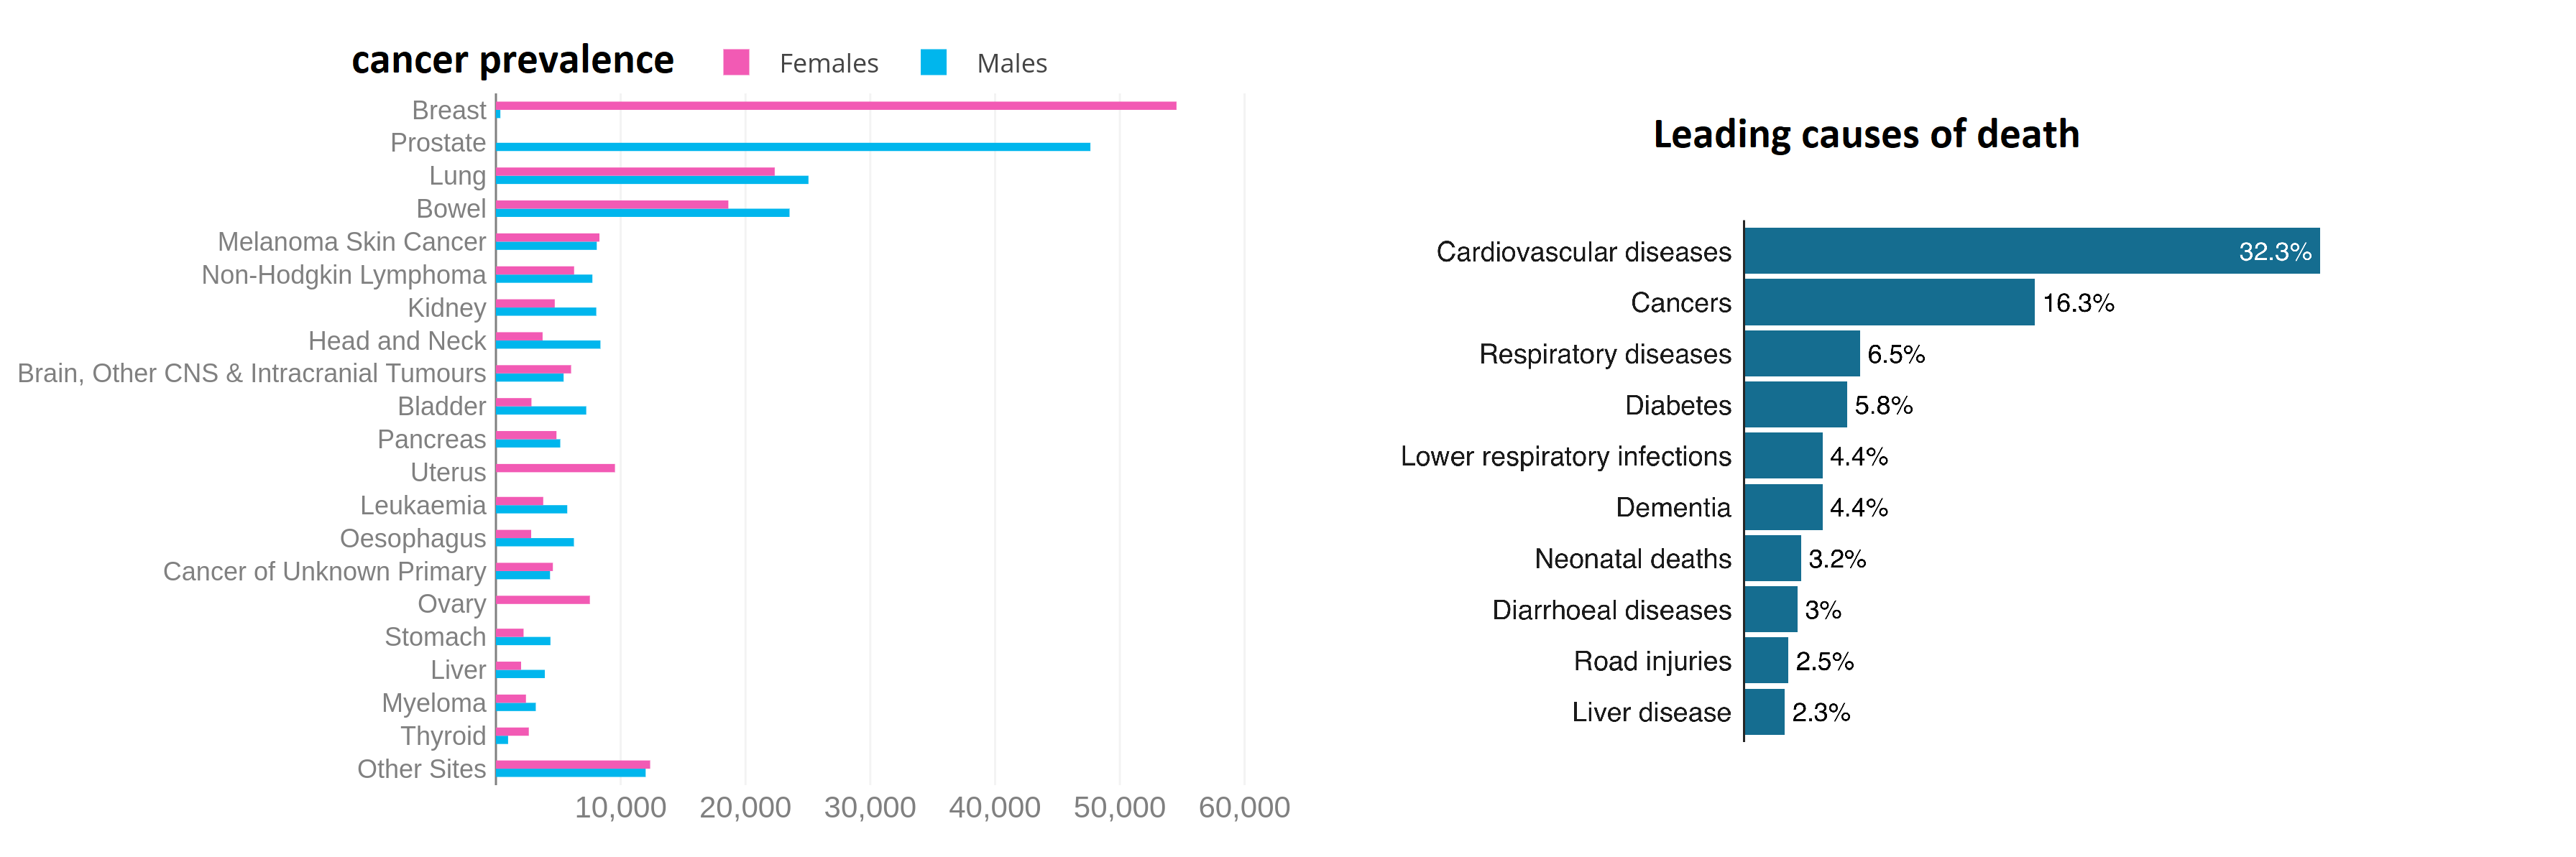

The combination of its high mortality and prevelence make lung cancer by far the most common cause of cancer related death.

This makes early diagnosis all that more important, the earlier a patient is diagnosed, the faster he/she can be treated, the higher the chance of recovery.

In addition to the 1013 CT scans, the dataset includes annotations from 4 different radiologists.
These annotations were obtained independently, afterwards the radiologists discussed their findings and finilized a total of 2669 detected long nodules (tumors).<br>
In realitiy there is even more nodules(7371), however, the radiologists only retained nodules that have an equivalent diameter greater than 3 mm. This is set as a thresh hold since smaller nodules are often not as harmful.<br>
The total count of nodules aswell as more information regarding the malignancy of the nodules is provided in xls files.

These annotations make this dataset especially interesting for applications in machine learning & computer aided diagnosis.

In [20]:
ann = pl.query(pl.Annotation)[0]
ann.visualize_in_scan()

Loading dicom files ... This may take a moment.


C:\Users\Joakim\.conda\envs\ada\lib\site-packages\pylidc\Scan.py:67: UserWarning: Could not find `dicom` configuration section or  `path` configuration option under that section.A template config file will be written to C:\Users\Joakim\pylidc.conf.
  warnings.warn(msg.format(conf_file))


RuntimeError: Could not establish path to dicom files. Have you specified the `path` option in the configuration file C:\Users\Joakim\pylidc.conf?

However, they are also interesting for many other Data Science applications.

Some ideas:

- one could compare the shapes/sizee of the individual nodules and find a correlation with malignancy, in reality more spherical tumors tend be more likely to be benign.

 Spherephicity is a self-evident way of quantifying this.
 To every annotation a number can be assigned that represents how closely the shape represents a sphere (1: sphere, 0: lower dimensional shape)

Malignant tumor
Sphericity: 0.8273486867112941


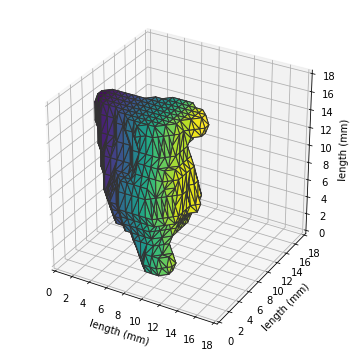

In [3]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5)[5]
print('Malignant tumor')
print('Sphericity: '+str(np.power(6*ann.volume, 2/3)*np.power(np.pi, 1/3)/ann.surface_area))
ann.visualize_in_3d()

Benign tumor
Sphericity: 0.8777946395184181


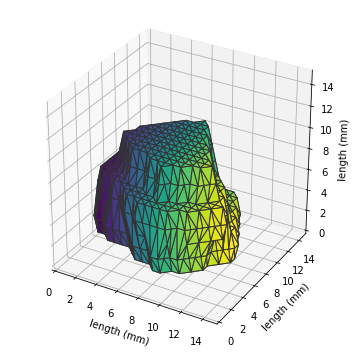

In [4]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 1)[1]
print('Benign tumor')
print('Sphericity: '+str(np.power(6*ann.volume, 2/3)*np.power(np.pi, 1/3)/ann.surface_area))
ann.visualize_in_3d()

- One could look at the variance between the annotations of different radiologists and showcase the inconsistency of diagnosis between different radiologists. This problem may bemuch less prevalent in computer aided diagnosis.

Loading dicom files ... This may take a moment.


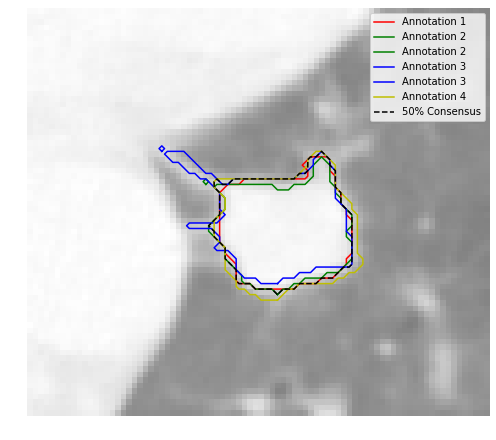

In [5]:
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0078').first()
vol = scan.to_volume()

nods = scan.cluster_annotations()
anns = nods[0]

cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

k = int(0.5*(cbbox[2].stop - cbbox[2].start))

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

- One could use the large amount of annotations to contruct a probability map that can provide insight into which areas of the lung are most likely to develope tumors.

In [6]:
os.chdir('D:\Cropped')
nodules = np.zeros((512,512,200))
tumor_vol = np.zeros(1013)
i=1
while i < 1013:
    print(i)
    try:
        nod = np.load('_'+str(i)+'.npz')['arr_0']
        tumor_vol[i] = np.sum(nod)
        nodules += nod
        i+=1
    except:
        i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


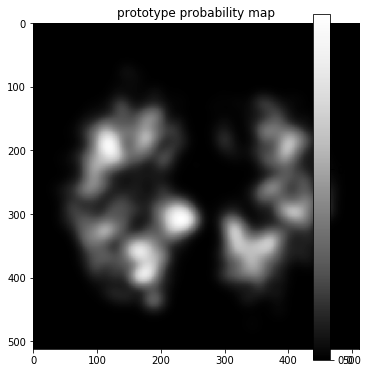

In [7]:
prob_map = gaussian_filter(nodules, sigma=10)

H = np.array(prob_map[:,:,95])
fig = plt.figure(figsize=(6, 6))
    
ax = fig.add_subplot(111)
ax.set_title('prototype probability map')
plt.imshow(H, cmap='Greys_r')
ax.set_aspect('equal')
    
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

This "probability distribution" suggests that tumors are more likely to form around the edges of the lung rather than around the primary bronchi, This may be explain by the fact that there is most tissue deeper in the lungs
Note: this plot is not at all correct as it does not take into account that the lungs have different volumes.
Ideally we want to rescale the nodule from the original lungs to a standerdized lung shape and project it on that standerdize lung

- Since the scale of each scan is know, using some segmentation algorithm we can estimate, forexample, the size of the patient. This can than be used together with the nodule counts to find correlations between the size of the patient and lung cancer.

The size/weight of the cells that make up the body of a big person are the same as those making up the body of a smaller person. This means that bigger people simply have more cells than smaller people. If the probability of a cell mutating to form cancer is approximately independent of how big a person is, there should be a linear relationship between the size of a person, and there probability to develope lung cancer.

For now I have used lung volume instead, altough it may seem like a logical assumption that there should be a linear relation between the size of a patient and their lung volume, we have to take into concideration that in the end we will be comparing lung volume to tumor volume, while the tumor volume may have a significant impact on lung volume. (when lungs are diseased, they tend to decrease in size). Thus, a future improvement would be segmenting the soft tissue instead (new problem: soft tissue is not completely captures in CT scan)

In [8]:
os.chdir('D:\Lungs')

In [9]:
lung = np.load('_'+str(2)+'.npz')['arr_0']
lung[lung>0.01]=1

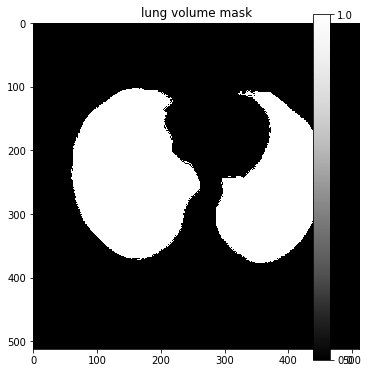

In [10]:
H = np.array(lung[:,:,60])
fig = plt.figure(figsize=(6, 6))
    
ax = fig.add_subplot(111)
ax.set_title('lung volume mask')
plt.imshow(H, cmap='Greys_r')
ax.set_aspect('equal')
    
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

In [20]:
lung_vol = np.zeros(1013)
i=0
while i < 1013:
    try:
        lung = np.load('_'+str(i)+'.npz')['arr_0']
        lung[lung>0.01]=1
        lung_vol[i] = np.sum(lung)
        print(i)
        i+=1
    except:
        i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
177
178
179
180
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280


D:\programs\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


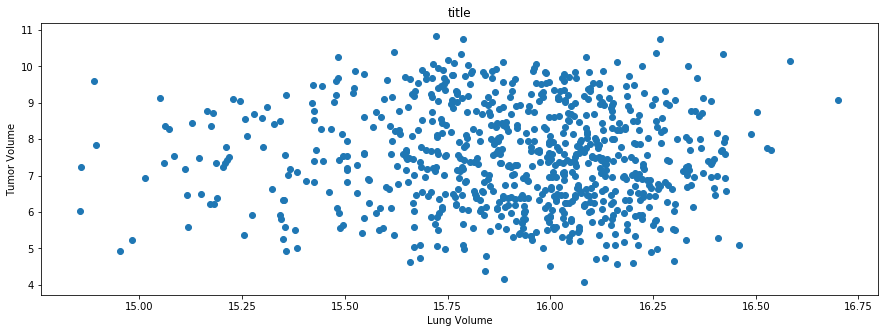

In [44]:
plt.figure(figsize=(15, 5))
plt.scatter(np.log(lung_vol), np.log(tumor_vol))
plt.title("title")
plt.xlabel("Lung Volume")
plt.ylabel("Tumor Volume")
plt.show()

In [48]:
print('Almost insignificant correlation: '+str(pearsonr(lung_vol, tumor_vol)[0]))

Almost insignificant correlation: -0.030038380637233148


**Notes:**
- All the above results are prototypes with much room for improvement
- Im not sure how specific our topic has to be, we can explore other forms of medical data rather than only this lung cancer example.